In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, distinct, and_, or_

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [11]:
twelve_months = session.query(Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23').all()
twelve_months
#for results in twelve_months:
 #   print('station:{0},date:{1},prcp:{2},tobs:{3}'.\
  #        format(results.station, results.date, results.prcp, results.tobs))

[('USC00519397', '2016-08-24', 0.08, 79.0),
 ('USC00519397', '2016-08-25', 0.08, 80.0),
 ('USC00519397', '2016-08-26', 0.0, 79.0),
 ('USC00519397', '2016-08-27', 0.0, 77.0),
 ('USC00519397', '2016-08-28', 0.01, 78.0),
 ('USC00519397', '2016-08-29', 0.0, 78.0),
 ('USC00519397', '2016-08-30', 0.0, 79.0),
 ('USC00519397', '2016-08-31', 0.13, 80.0),
 ('USC00519397', '2016-09-01', 0.0, 81.0),
 ('USC00519397', '2016-09-02', 0.0, 80.0),
 ('USC00519397', '2016-09-03', 0.0, 79.0),
 ('USC00519397', '2016-09-04', 0.03, 75.0),
 ('USC00519397', '2016-09-05', None, 79.0),
 ('USC00519397', '2016-09-06', None, 76.0),
 ('USC00519397', '2016-09-07', 0.05, 76.0),
 ('USC00519397', '2016-09-08', 0.0, 80.0),
 ('USC00519397', '2016-09-09', 0.03, 79.0),
 ('USC00519397', '2016-09-10', 0.0, 78.0),
 ('USC00519397', '2016-09-11', 0.05, 76.0),
 ('USC00519397', '2016-09-12', 0.0, 78.0),
 ('USC00519397', '2016-09-13', 0.02, 78.0),
 ('USC00519397', '2016-09-14', 1.32, 75.0),
 ('USC00519397', '2016-09-15', 0.42, 79.0)

In [12]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [14]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15eeec980f0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [15]:
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x15eeed75400>,
 'longitude': -157.8168,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1}

In [16]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [17]:
measure_all = session.query(Measurement.station, Measurement.date, \
    Measurement.prcp, Measurement.tobs).\
    order_by(Measurement.date.desc()).all()
measure_all

[('USC00519397', '2017-08-23', 0.0, 81.0),
 ('USC00514830', '2017-08-23', 0.0, 82.0),
 ('USC00519523', '2017-08-23', 0.08, 82.0),
 ('USC00516128', '2017-08-23', 0.45, 76.0),
 ('USC00519397', '2017-08-22', 0.0, 82.0),
 ('USC00519523', '2017-08-22', 0.0, 82.0),
 ('USC00516128', '2017-08-22', 0.5, 76.0),
 ('USC00519397', '2017-08-21', 0.0, 81.0),
 ('USC00514830', '2017-08-21', 0.02, 79.0),
 ('USC00519523', '2017-08-21', None, 82.0),
 ('USC00516128', '2017-08-21', 0.56, 76.0),
 ('USC00519397', '2017-08-20', 0.0, 81.0),
 ('USC00514830', '2017-08-20', 0.01, 80.0),
 ('USC00516128', '2017-08-20', None, 78.0),
 ('USC00519397', '2017-08-19', 0.0, 79.0),
 ('USC00514830', '2017-08-19', 0.0, 80.0),
 ('USC00519523', '2017-08-19', None, 85.0),
 ('USC00516128', '2017-08-19', 0.09, 71.0),
 ('USC00519397', '2017-08-18', 0.0, 80.0),
 ('USC00514830', '2017-08-18', 0.0, 77.0),
 ('USC00519281', '2017-08-18', 0.06, 79.0),
 ('USC00516128', '2017-08-18', None, 76.0),
 ('USC00514830', '2017-08-17', 0.0, 78.0),


In [18]:
twelve_months_df = pd.DataFrame(measure_all)
twelve_months_df.head()

,station,date,prcp,tobs
0,USC00519397,2017-08-23,0.00,81.0
1,USC00514830,2017-08-23,0.00,82.0
2,USC00519523,2017-08-23,0.08,82.0
3,USC00516128,2017-08-23,0.45,76.0
4,USC00519397,2017-08-22,0.00,82.0


In [19]:
twelve_months_df.set_index('date')
twelve_months_df.head()

,station,date,prcp,tobs
0,USC00519397,2017-08-23,0.00,81.0
1,USC00514830,2017-08-23,0.00,82.0
2,USC00519523,2017-08-23,0.08,82.0
3,USC00516128,2017-08-23,0.45,76.0
4,USC00519397,2017-08-22,0.00,82.0


In [20]:
twelve_months_df.sort_values(by=['date'])
twelve_months_df.head()

,station,date,prcp,tobs
0,USC00519397,2017-08-23,0.00,81.0
1,USC00514830,2017-08-23,0.00,82.0
2,USC00519523,2017-08-23,0.08,82.0
3,USC00516128,2017-08-23,0.45,76.0
4,USC00519397,2017-08-22,0.00,82.0


In [21]:
twelve_months_df.dtypes

station     object
date        object
prcp       float64
tobs       float64
dtype: object

In [22]:
twelve_months_df['date'] = pd.to_datetime(twelve_months_df['date'])

In [23]:
twelve_months_df.dtypes

station            object
date       datetime64[ns]
prcp              float64
tobs              float64
dtype: object

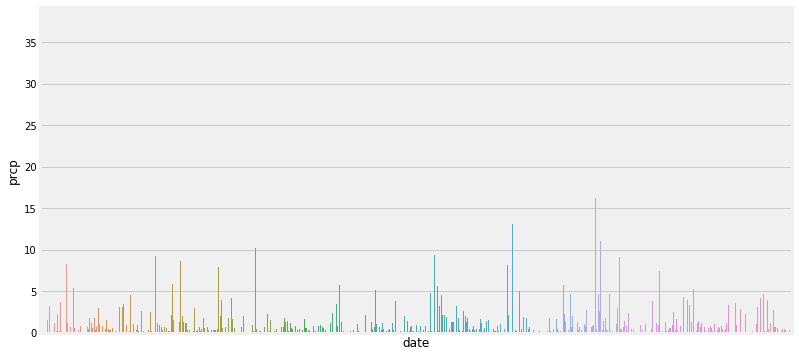

In [24]:
fig, ax = plt.subplots(figsize = (12,6)) 
fig = sns.barplot(x="date", y="prcp", data=twelve_months_df, estimator=sum, ci=None, ax=ax)

x_dates = twelve_months_df['date'].dt.strftime('%Y-%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')
plt.tick_params(labelbottom=False)

In [25]:
twelve_months_df.describe()

,prcp,tobs
count,18103.000000,19550.000000
mean,0.160644,73.097954
std,0.468746,4.523527
min,0.000000,53.000000
25%,0.000000,70.000000
50%,0.010000,73.000000
75%,0.110000,76.000000
max,11.530000,87.000000


In [26]:
twelve_months_df.prcp.describe()

count    18103.000000
mean         0.160644
std          0.468746
min          0.000000
25%          0.000000
50%          0.010000
75%          0.110000
max         11.530000
Name: prcp, dtype: float64

In [27]:
twelve_months_df.head()

,station,date,prcp,tobs
0,USC00519397,2017-08-23,0.00,81.0
1,USC00514830,2017-08-23,0.00,82.0
2,USC00519523,2017-08-23,0.08,82.0
3,USC00516128,2017-08-23,0.45,76.0
4,USC00519397,2017-08-22,0.00,82.0


In [29]:
# Design a query to show how many stations are available in this dataset?
m_station_count = session.query(Station.station).count()
m_station_count

9

In [30]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).\
    all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [31]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
active_min_max_avg = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), \
    func.avg(Measurement.tobs))\
    .filter(Measurement.station == 'USC00519281')\
    .all()
active_min_max_avg

[(54.0, 85.0, 71.66378066378067)]

In [32]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results\
# as a histogram
count_tobs = session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).\
    all()
count_tobs

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
tobs_year = session.query(Measurement.tobs)\
    .filter(Measurement.date > '2016-08-23')\
    .filter(Measurement.station == 'USC00519281')\
    .all()
tobs_year

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [34]:
tobs_year_df = pd.DataFrame(tobs_year)
tobs_year_df.head()

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0


C:\Users\dbeaman\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


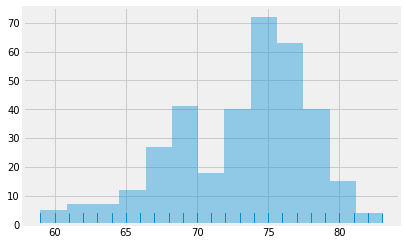

In [35]:
sns.distplot(tobs_year_df, kde=False, rug=True)

In [36]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-06-01', '2017-06-08'))

[(74.0, 77.75, 81.0)]


In [37]:
calc_temps_list = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), \
    func.max(Measurement.tobs))\
    .filter(Measurement.date >= '2017-06-01').filter(Measurement.date <= '2017-06-08').all()
calc_temps_list

[(74.0, 77.75, 81.0)]

In [38]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps_df = pd.DataFrame(calc_temps_list, columns=['TMIN','TAVG','TMAX'])
calc_temps_df

,TMIN,TAVG,TMAX
0,74.0,77.75,81.0


In [39]:
tmin = calc_temps_df.iloc[0][0]
tmin

74.0

In [40]:
tavg = calc_temps_df.iloc[0][1]
tavg

77.75

In [41]:
tmax = calc_temps_df.iloc[0][2]
tmax

81.0

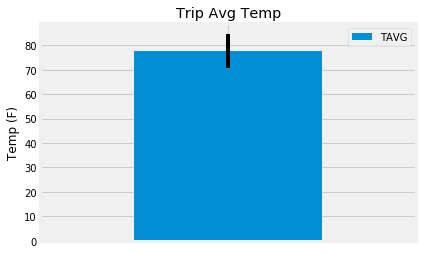

In [42]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
ax = calc_temps_df[['TAVG']].plot(kind='bar', title ="Trip Avg Temp", yerr = tmax-tmin,\
    legend=True)
plt.tick_params(labelbottom=False)
ax.set_ylabel("Temp (F)")
plt.show()

In [43]:
date_prcp = session.query(Measurement.date, Measurement.prcp).all()
date_prcp

[('2010-01-01', 0.08),
 ('2010-01-02', 0.0),
 ('2010-01-03', 0.0),
 ('2010-01-04', 0.0),
 ('2010-01-06', None),
 ('2010-01-07', 0.06),
 ('2010-01-08', 0.0),
 ('2010-01-09', 0.0),
 ('2010-01-10', 0.0),
 ('2010-01-11', 0.01),
 ('2010-01-12', 0.0),
 ('2010-01-14', 0.0),
 ('2010-01-15', 0.0),
 ('2010-01-16', 0.0),
 ('2010-01-17', 0.0),
 ('2010-01-18', 0.0),
 ('2010-01-19', 0.0),
 ('2010-01-20', 0.0),
 ('2010-01-21', 0.0),
 ('2010-01-22', 0.0),
 ('2010-01-23', 0.0),
 ('2010-01-24', 0.01),
 ('2010-01-25', 0.0),
 ('2010-01-26', 0.04),
 ('2010-01-27', 0.12),
 ('2010-01-28', 0.0),
 ('2010-01-30', None),
 ('2010-01-31', 0.03),
 ('2010-02-01', 0.01),
 ('2010-02-03', None),
 ('2010-02-04', 0.01),
 ('2010-02-05', 0.0),
 ('2010-02-06', 0.0),
 ('2010-02-07', 0.0),
 ('2010-02-08', 0.0),
 ('2010-02-09', 0.0),
 ('2010-02-11', 0.0),
 ('2010-02-12', 0.02),
 ('2010-02-13', 0.01),
 ('2010-02-14', 0.0),
 ('2010-02-15', 0.0),
 ('2010-02-16', 0.0),
 ('2010-02-17', 0.0),
 ('2010-02-19', None),
 ('2010-02-20', 0

In [55]:
def calc_temps_dates(start_date, end_date='2017-08-23'):
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date).all()
print(calc_temps_dates('2017-06-06', '2017-06-08'))
all_starts_ends = []
for foo in calc_temps_dates:
    measurement_dict = {}
    measurement_dict["TMIN"] = calc_temps_dates[0]
    measurement_dict["TAVG"] = calc_temps_dates[1]
    measurement_dict["TMAX"] = calc_temps_dates[2]
    all_starts_ends.append(measurement_dict)
print(all_starts_ends)

[(53.0, 73.09795396419437, 87.0)]


TypeError: 'function' object is not iterable

In [ ]:
    # Create a dictionary from the row data and append to a list of tobs
    all_starts_ends = []
    for measurement in results:
        measurement_dict = {}
        measurement_dict["TMIN"] = results[0]
        measurement_dict["TAVG"] = results[1]
        measurement_dict["TMAX"] = results[2]
        all_starts_ends.append(measurement_dict)

In [85]:
def calc_temps(start_date, end_date="2017-08-23"):
    # Return a JSON list of the minimum temperature, the average temperature, and the max temperature for
    # a given start or start-end range.
    # When given the start and the end date, calculate the `TMIN`, `TAVG`, and `TMAX` for dates between 
    # the start and end date inclusive.
    #start_date = request.args.get('start_date', None)
    #end_date = request.args.get('start_date', 'end_date')
    results = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), \
        func.max(Measurement.tobs))\
        .filter(Measurement.date >= start_date)\
        .filter(Measurement.date <= end_date).all()

    # Create a dictionary from the row data and append to a list of tobs
    all_starts_ends = []
    measurement_dict = {}
    measurement_dict["TMIN"] = results[0][0]
    measurement_dict["TAVG"] = results[0][1]
    measurement_dict["TMAX"] = results[0][2]
    all_starts_ends.append(measurement_dict)

    return(all_starts_ends)

In [86]:
calc_temps('2015-05-01')

[{'TMIN': 56.0, 'TAVG': 74.68003766478343, 'TMAX': 87.0}]

In [154]:
all_starts_ends = []
for measurement in calc_temps_dates:
    measurement_dict = {}
    measurement_dict["TMIN"] = results[1]
    measurement_dict["TAVG"] = results[2]
    measurement_dict["TMAX"] = results[3]
    all_starts_ends.append(measurement_dict)
print(all_starts_ends)

[{'TMIN': 'USC00516128', 'TAVG': '2017-08-23', 'TMAX': 0.45}, {'TMIN': 'USC00516128', 'TAVG': '2017-08-23', 'TMAX': 0.45}, {'TMIN': 'USC00516128', 'TAVG': '2017-08-23', 'TMAX': 0.45}, {'TMIN': 'USC00516128', 'TAVG': '2017-08-23', 'TMAX': 0.45}]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


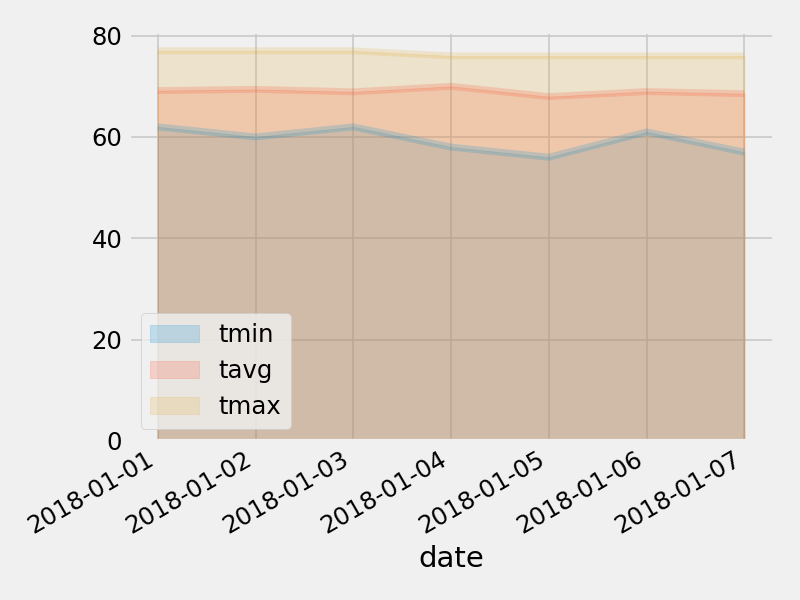

In [23]:
# Plot the daily normals as an area plot with `stacked=False`


In [119]:
same_station = session.query(Measurement, Station)\
    .filter(Measurement.station == Station.station).all()

#for record in same_station:
 #   (measurement, station) = record
  #  print(measurement.station)
   # print(station.station)

In [122]:
sel = [Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs, \
       Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
same_station = session.query(*sel).filter(Measurement.station == Station.station).all()

for record in same_station:
    (m_sta, m_dt, m_prcp, m_tobs, s_sta, s_name, s_lat, s_lng, s_ele) = record
    print(
        f"'{m_sta} {m_dt} {m_prcp} {m_tobs}'"
        f"'{s_sta} {s_name} {s_lat} {s_lng} {s_ele}'.")

'USC00519397 2010-01-01 0.08 65.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-02 0.0 63.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-03 0.0 74.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-04 0.0 76.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-06 None 73.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-07 0.06 70.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-08 0.0 64.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-09 0.0 68.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-10 0.0 73.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-11 0.01 64.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2010-01-12 0.0 61.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3

'USC00519397 2015-01-27 0.0 72.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-01-28 0.0 70.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-01-29 0.0 74.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-01-30 0.0 63.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-01-31 0.0 64.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-01 0.0 68.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-02 0.0 74.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-03 0.0 76.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-04 0.01 72.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-05 0.19 67.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2015-02-06 0.0 62.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0

'USC00519397 2016-11-28 0.01 75.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-11-29 0.0 68.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-11-30 0.14 75.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-01 0.12 75.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-02 0.03 72.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-03 0.0 69.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-04 0.03 71.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-05 0.43 68.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-06 0.02 67.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-07 0.0 69.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.8168 3.0'.
'USC00519397 2016-12-08 0.03 73.0''USC00519397 WAIKIKI 717.2, HI US 21.2716 -157.81

'USC00513117 2013-06-12 0.0 75.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-13 0.02 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-14 0.08 72.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-15 0.01 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-16 0.0 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-17 0.01 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-18 0.02 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-19 0.0 74.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-20 0.0 72.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-21 0.22 70.0''USC00513117 KANEOHE 838.1, HI US 21.4234 -157.8015 14.6'.
'USC00513117 2013-06-22 0.27 75.0''USC00513117 KANEOHE 838.1, HI US 21.423

'USC00514830 2010-03-30 0.03 71.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-03-31 0.04 67.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-01 0.02 69.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-02 0.05 71.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-04 None 70.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-05 0.1 70.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-06 0.15 70.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-07 0.05 71.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2010-04-08 0.32 72.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC0051483

'USC00514830 2015-06-11 0.0 76.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-12 0.03 78.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-14 None 78.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-15 0.0 78.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-16 0.0 78.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-17 0.16 74.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-18 0.04 79.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-19 0.02 77.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 2015-06-20 0.06 73.0''USC00514830 KUALOA RANCH HEADQUARTERS 886.9, HI US 21.5213 -157.8374 7.0'.
'USC00514830 

'USC00517948 2014-09-02 0.0 83.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-03 0.0 83.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-04 0.0 80.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-05 None 80.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-08 None 80.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-09 0.0 83.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-10 0.0 84.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-11 0.0 81.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-12 0.0 80.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-15 None 79.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014-09-16 None 82.0''USC00517948 PEARL CITY, HI US 21.3934 -157.9751 11.9'.
'USC00517948 2014

'USC00519523 2011-03-20 0.23 74.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-21 0.0 74.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-22 0.17 73.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-23 0.0 74.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-24 0.19 76.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-25 0.02 76.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-26 0.0 74.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-27 0.0 74.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-29 0.0 73.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2011-03-30 

'USC00519523 2015-06-22 0.0 78.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-23 0.05 79.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-24 0.0 79.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-25 0.14 77.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-26 0.0 77.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-27 0.0 81.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-29 None 75.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-06-30 0.0 72.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-07-01 0.0 71.0''USC00519523 WAIMANALO EXPERIMENTAL FARM, HI US 21.33556 -157.71139 19.5'.
'USC00519523 2015-07-02 0

'USC00519281 2012-02-14 0.0 67.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-15 0.01 66.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-16 0.0 71.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-17 0.04 69.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-18 0.12 70.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-19 0.6 69.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-20 0.0 73.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-21 0.0 71.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-22 0.03 70.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2012-02-23 0.19 70.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -1

'USC00519281 2016-03-25 0.38 72.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-26 0.06 76.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-27 0.08 76.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-28 0.0 73.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-29 0.02 72.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-30 0.04 62.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-03-31 0.0 65.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-04-01 0.0 68.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-04-02 0.0 74.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -157.84888999999998 32.9'.
'USC00519281 2016-04-03 0.0 74.0''USC00519281 WAIHEE 837.5, HI US 21.45167 -1

'USC00511918 2012-10-14 0.02 79.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-15 0.02 74.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-16 0.0 69.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-17 0.0 67.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-18 0.0 70.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-19 0.0 73.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-20 0.0 78.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-21 0.0 82.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-22 0.0 71.0''USC00511918 HONOLULU OBSERVATORY 702.2, HI US 21.3152 -157.9992 0.9'.
'USC00511918 2012-10-23 0.0 68.0''USC00511918 HONOLULU OBSERVA

'USC00516128 2011-06-21 1.03 71.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-22 1.65 70.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-23 0.68 70.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-24 1.16 69.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-25 0.06 74.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-26 0.29 69.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-27 0.98 72.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-28 0.25 70.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-29 0.06 72.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2011-06-30 0.0 72.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331

'USC00516128 2015-11-26 3.68 72.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-11-27 3.26 73.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-11-28 0.16 73.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-11-29 0.19 72.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-11-30 0.04 71.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-12-01 0.03 73.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-12-02 0.08 70.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-12-03 0.57 71.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-12-04 0.01 71.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.3331 -157.8025 152.4'.
'USC00516128 2015-12-05 0.05 70.0''USC00516128 MANOA LYON ARBO 785.2, HI US 21.333